Importing modules

In [1]:
#suppressing a warning - UserWarning: Wswiglal-redir-stdio
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal
import lal as _lal

In [2]:
import sys

sys.path.insert(0, "../")
from regular_precession import *
from systems_lib import *
from mismatch_n_SNR import *
import matplotlib.pyplot as plt
import matplotlib
import math
matplotlib.rcParams["figure.dpi"] = 200

Defining systems and redshifting chirp mass (z = 0.3)

In [3]:
# Define the default parameters for the system 1
default_precession_params_sys1 = redshifted_new_params(0.3, default_precession_params_sys1)
default_precession_params_sys1_NP = redshifted_new_params(0.3, default_precession_params_sys1_NP)

# Define the default parameters for the system 2
default_precession_params_sys2 = redshifted_new_params(0.3, default_precession_params_sys2)
default_precession_params_sys2_NP = redshifted_new_params(0.3, default_precession_params_sys2_NP)

# Define the default parameters for the system 3
default_precession_params_sys3 = redshifted_new_params(0.3, default_precession_params_sys3)
default_precession_params_sys3_NP = redshifted_new_params(0.3, default_precession_params_sys3_NP)


System 1

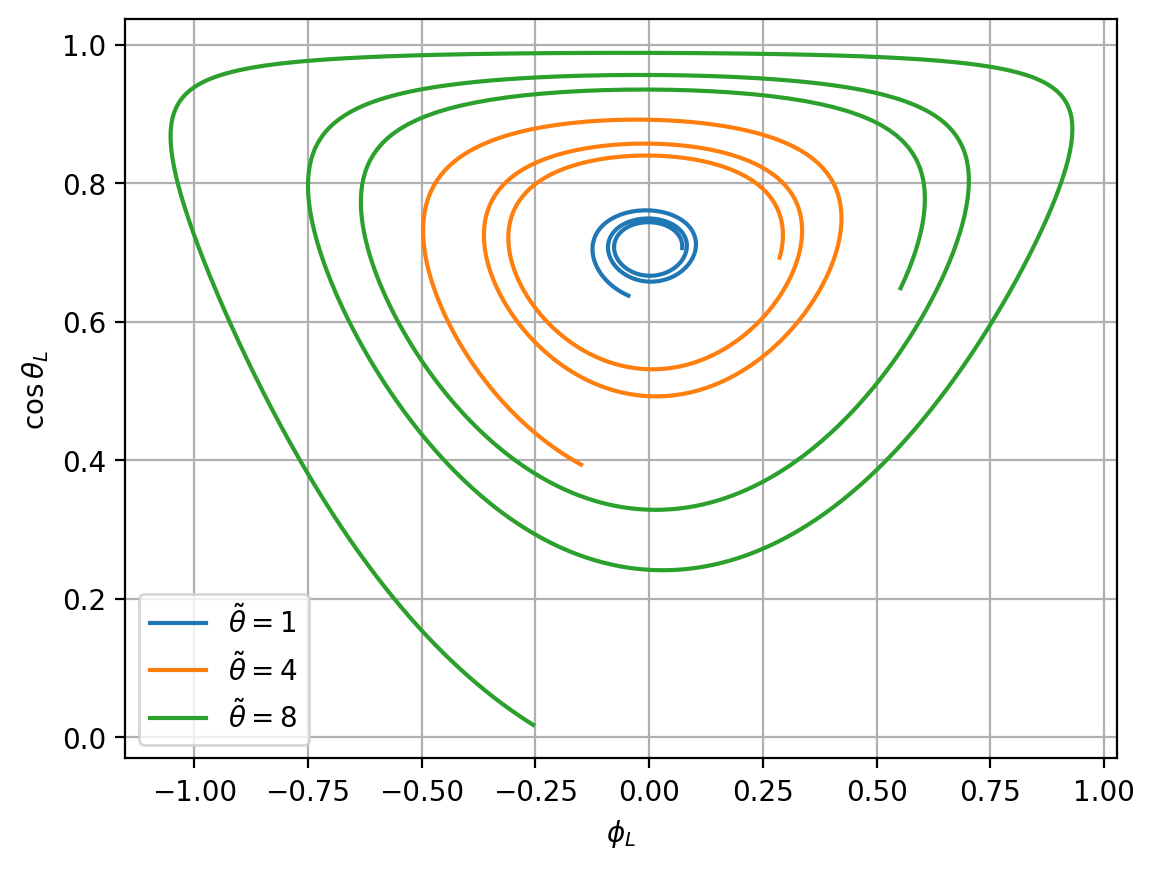

In [4]:
theta_array = np.array([1, 4, 8])
Mod_t_1_phi = []
Mod_t_1_cos_theta = []
for t_i in theta_array:
    default_precession_params_sys1['theta_tilde'] = t_i

    f_cut = Regular_precession(default_precession_params_sys1).get_f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)

    precession_initial = Regular_precession(default_precession_params_sys1)

    cos_t_L = precession_initial.cos_theta_L(f_range)
    phi_L_array = precession_initial.phi_L(f_range)
    
    Mod_t_1_cos_theta.append(cos_t_L)
    Mod_t_1_phi.append(phi_L_array)

    plt.plot(phi_L_array, cos_t_L, label = r'$\tilde\theta =  {}$'.format(t_i))
    plt.legend()
    plt.xlabel('$\phi_L$')
    plt.ylabel(r'$\cos \theta_L$')
    plt.grid()


System 2

([<matplotlib.axis.XTick at 0x302522250>,
 [Text(0.7853981633974483, 0, '$\\pi/4$'),
  Text(1.1780972450961724, 0, '$3\\pi/8$'),
  Text(1.5707963267948966, 0, '$\\pi/2$'),
  Text(1.9634954084936207, 0, '$5\\pi/8$'),
  Text(2.356194490192345, 0, '$3\\pi/4$')])

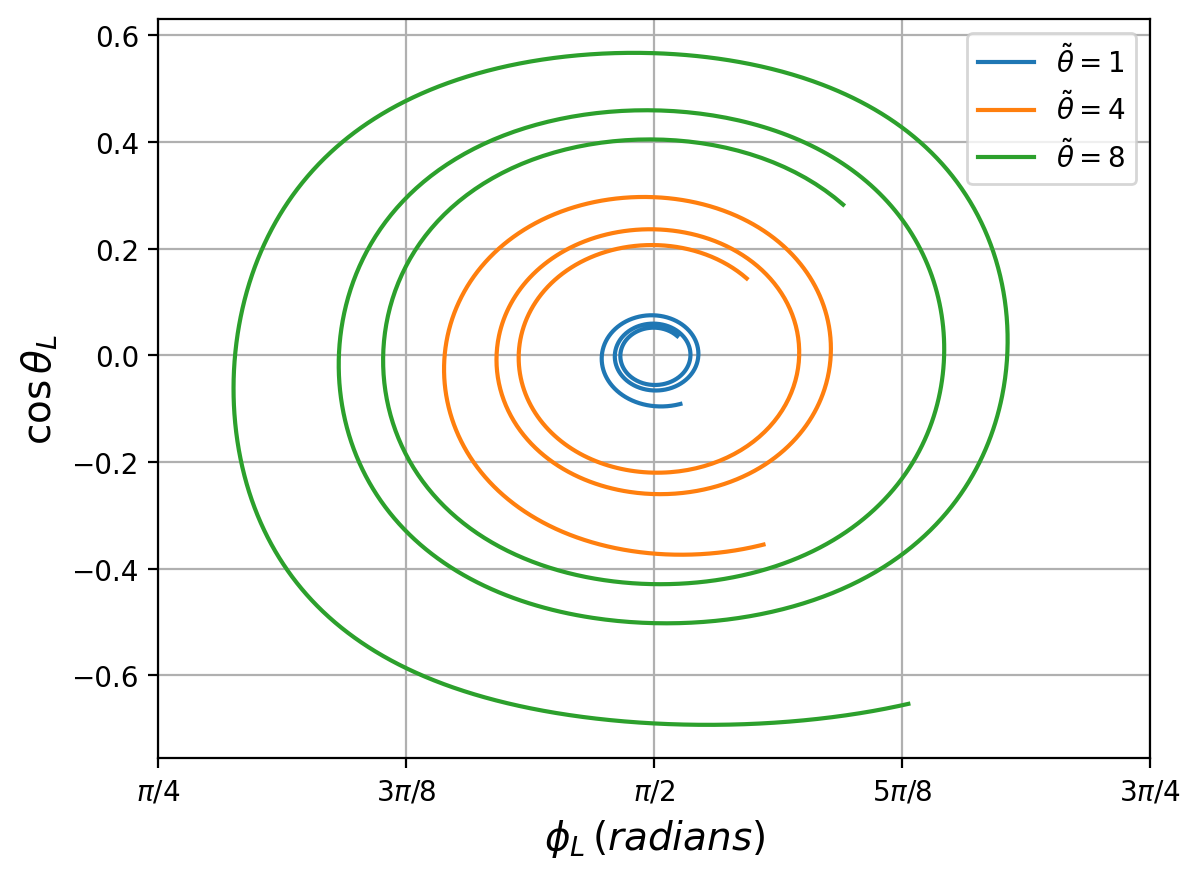

In [5]:
theta_array = np.array([1, 4, 8])
Mod_t_2_phi = []
Mod_t_2_cos_theta = []

iter1 = 0

label_array = [r'$\tilde{\theta} =  1$', r'$\tilde{\theta} =  4$', r'$\tilde{\theta} =  8$']

for t_i in theta_array:
    default_precession_params_sys2['theta_tilde'] = t_i

    f_cut = Regular_precession(default_precession_params_sys2).get_f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)

    precession_initial = Regular_precession(default_precession_params_sys2)

    cos_t_L = precession_initial.cos_theta_L(f_range)
    phi_L_array = precession_initial.phi_L(f_range)
    
    Mod_t_2_cos_theta.append(cos_t_L)
    Mod_t_2_phi.append(phi_L_array)

    plt.plot(phi_L_array, cos_t_L, label = label_array[iter1])
    plt.legend()
    plt.xlim([np.pi/4, 3*np.pi/4])
    plt.xlabel('$\phi_L \, (radians)$', fontsize = 14)
    plt.ylabel(r'$\cos \theta_L$', fontsize = 14)
    plt.grid(True)
    iter1+=1
x_ticks = np.array([np.pi/4, 3*np.pi/8, np.pi/2, 5*np.pi/8, 3*np.pi/4])
x_labels = [r'$\pi/4$', r'$3\pi/8$', r'$\pi/2$', r'$5\pi/8$', r'$3\pi/4$']

plt.xticks(x_ticks, x_labels)

System 3

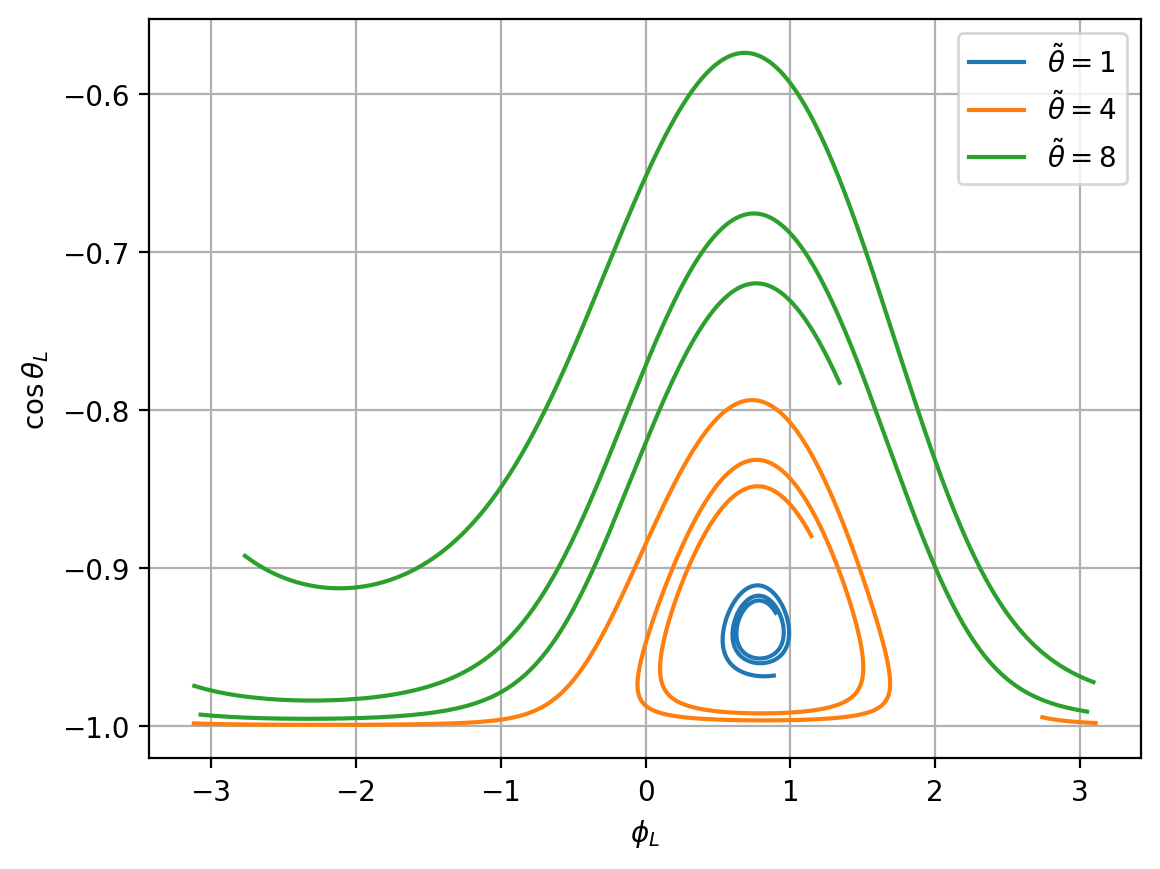

In [6]:
theta_array = np.array([1, 4, 8])
Mod_t_3_phi = []
Mod_t_3_cos_theta = []

for t_i in theta_array:
    default_precession_params_sys3['theta_tilde'] = t_i

    f_cut = Regular_precession(default_precession_params_sys3).get_f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)

    precession_initial = Regular_precession(default_precession_params_sys3)

    cos_t_L = precession_initial.cos_theta_L(f_range)
    phi_L_array = precession_initial.phi_L(f_range)
    
    #print(max(phi_L_array), min(phi_L_array))
    
    
    size_f = len(f_range)
    
    if max(phi_L_array) > 3.1:
        i_max = 0
        for i_max in range(size_f):
            if phi_L_array[i_max] > 3.11:
                phi_L_array[i_max] = math.nan
            i_max += 1
            
    if min(phi_L_array) < -3.12:
        i_min = 0
        for i_min in range(size_f):
            if phi_L_array[i_min] < -3.12:
                phi_L_array[i_min] = math.nan
            i_min += 1
            
    Mod_t_3_cos_theta.append(cos_t_L)
    Mod_t_3_phi.append(phi_L_array)
            
    plt.plot(phi_L_array, cos_t_L, label = r'$\tilde\theta =  {}$'.format(t_i))
    plt.legend()
    plt.xlabel('$\phi_L$')
    plt.ylabel(r'$\cos \theta_L$')
    plt.grid()

exploring other precession params for system 2

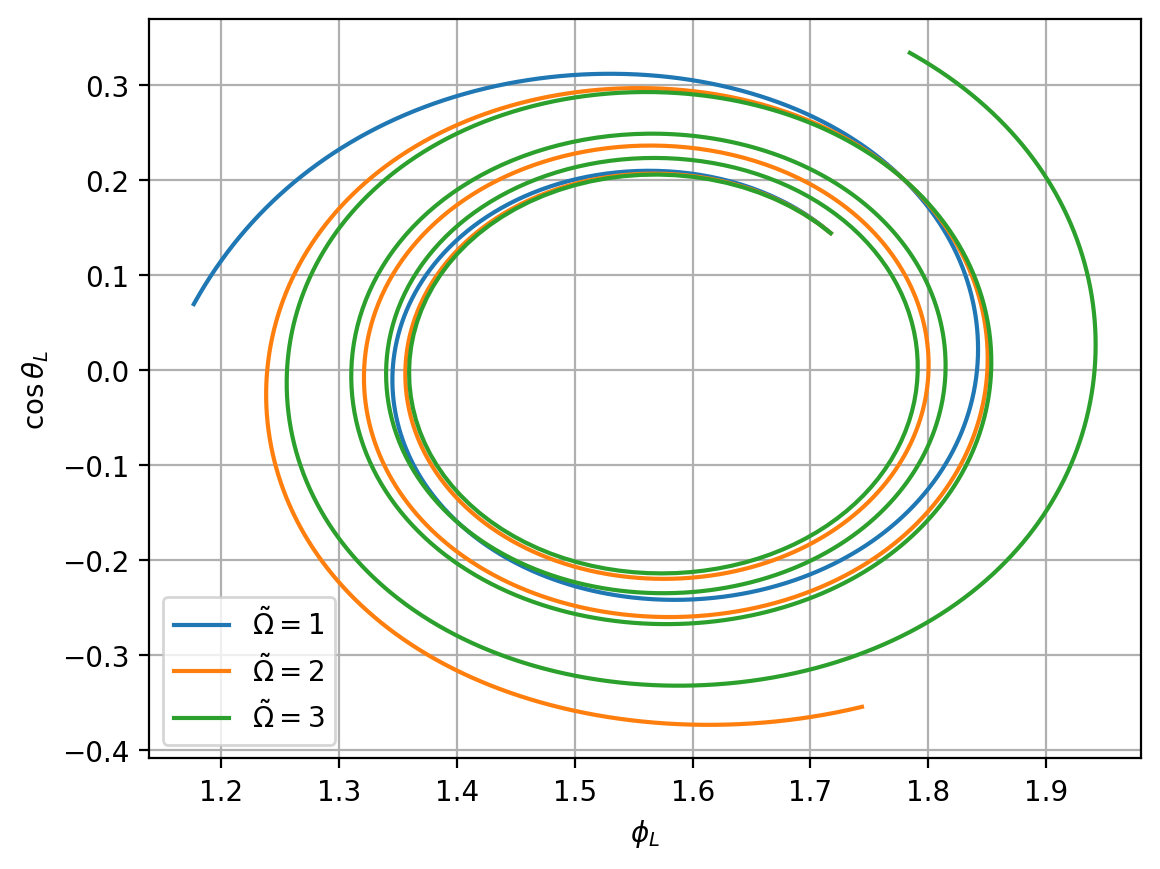

In [7]:
omega_array = np.array([1, 2, 3])
default_precession_params_sys2['theta_tilde'] = 4
default_precession_params_sys2['omega_tilde'] = 2
default_precession_params_sys2['gamma_P'] = 0
Mod_o_2_phi = []
Mod_o_2_cos_theta = []

for o_i in omega_array:
    default_precession_params_sys2['omega_tilde'] = o_i

    f_cut = Regular_precession(default_precession_params_sys2).get_f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)

    precession_initial = Regular_precession(default_precession_params_sys2)

    cos_t_L = precession_initial.cos_theta_L(f_range)
    phi_L_array = precession_initial.phi_L(f_range)
    
    Mod_o_2_cos_theta.append(cos_t_L)
    Mod_o_2_phi.append(phi_L_array)

    plt.plot(phi_L_array, cos_t_L, label = r'$\tilde\Omega =  {}$'.format(o_i))
    plt.legend()
    plt.xlabel('$\phi_L$')
    plt.ylabel(r'$\cos \theta_L$')
    plt.grid()
    


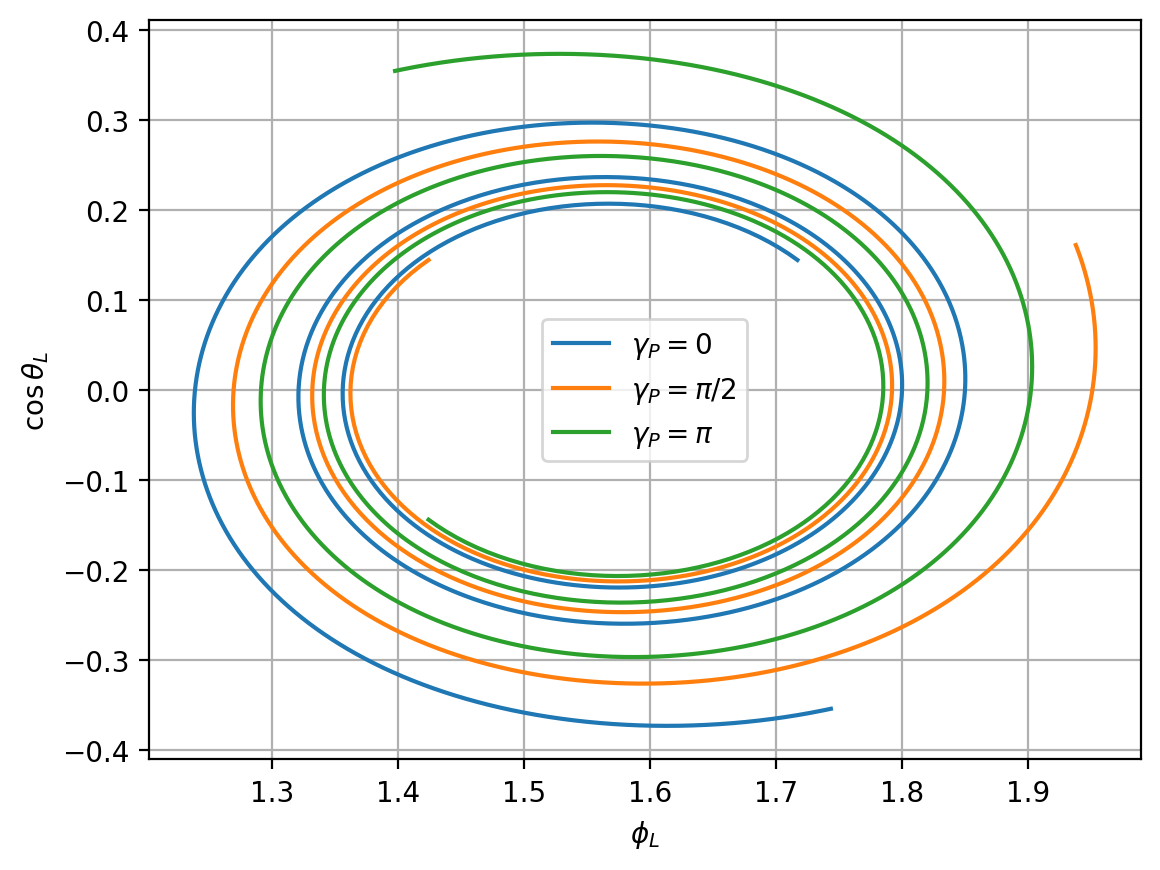

In [8]:
gamma_array = np.array([0, np.pi/2, np.pi])
labels = np.array([r'$\gamma_P = 0$', r'$\gamma_P = \pi/2$', r'$\gamma_P = \pi$'])
default_precession_params_sys2['theta_tilde'] = 4
default_precession_params_sys2['omega_tilde'] = 2

Mod_g_2_phi = []
Mod_g_2_cos_theta = []

it_1 = 0
for g_i in gamma_array:
    default_precession_params_sys2['gamma_P'] = g_i

    f_cut = Regular_precession(default_precession_params_sys2).get_f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)

    precession_initial = Regular_precession(default_precession_params_sys2)

    cos_t_L = precession_initial.cos_theta_L(f_range)
    phi_L_array = precession_initial.phi_L(f_range)
    
    Mod_g_2_cos_theta.append(cos_t_L)
    Mod_g_2_phi.append(phi_L_array)
    
    plt.plot(phi_L_array, cos_t_L, label = labels[it_1])
    plt.legend()
    plt.xlabel('$\phi_L$')
    plt.ylabel(r'$\cos \theta_L$')
    plt.grid()
    it_1 += 1 
    
    

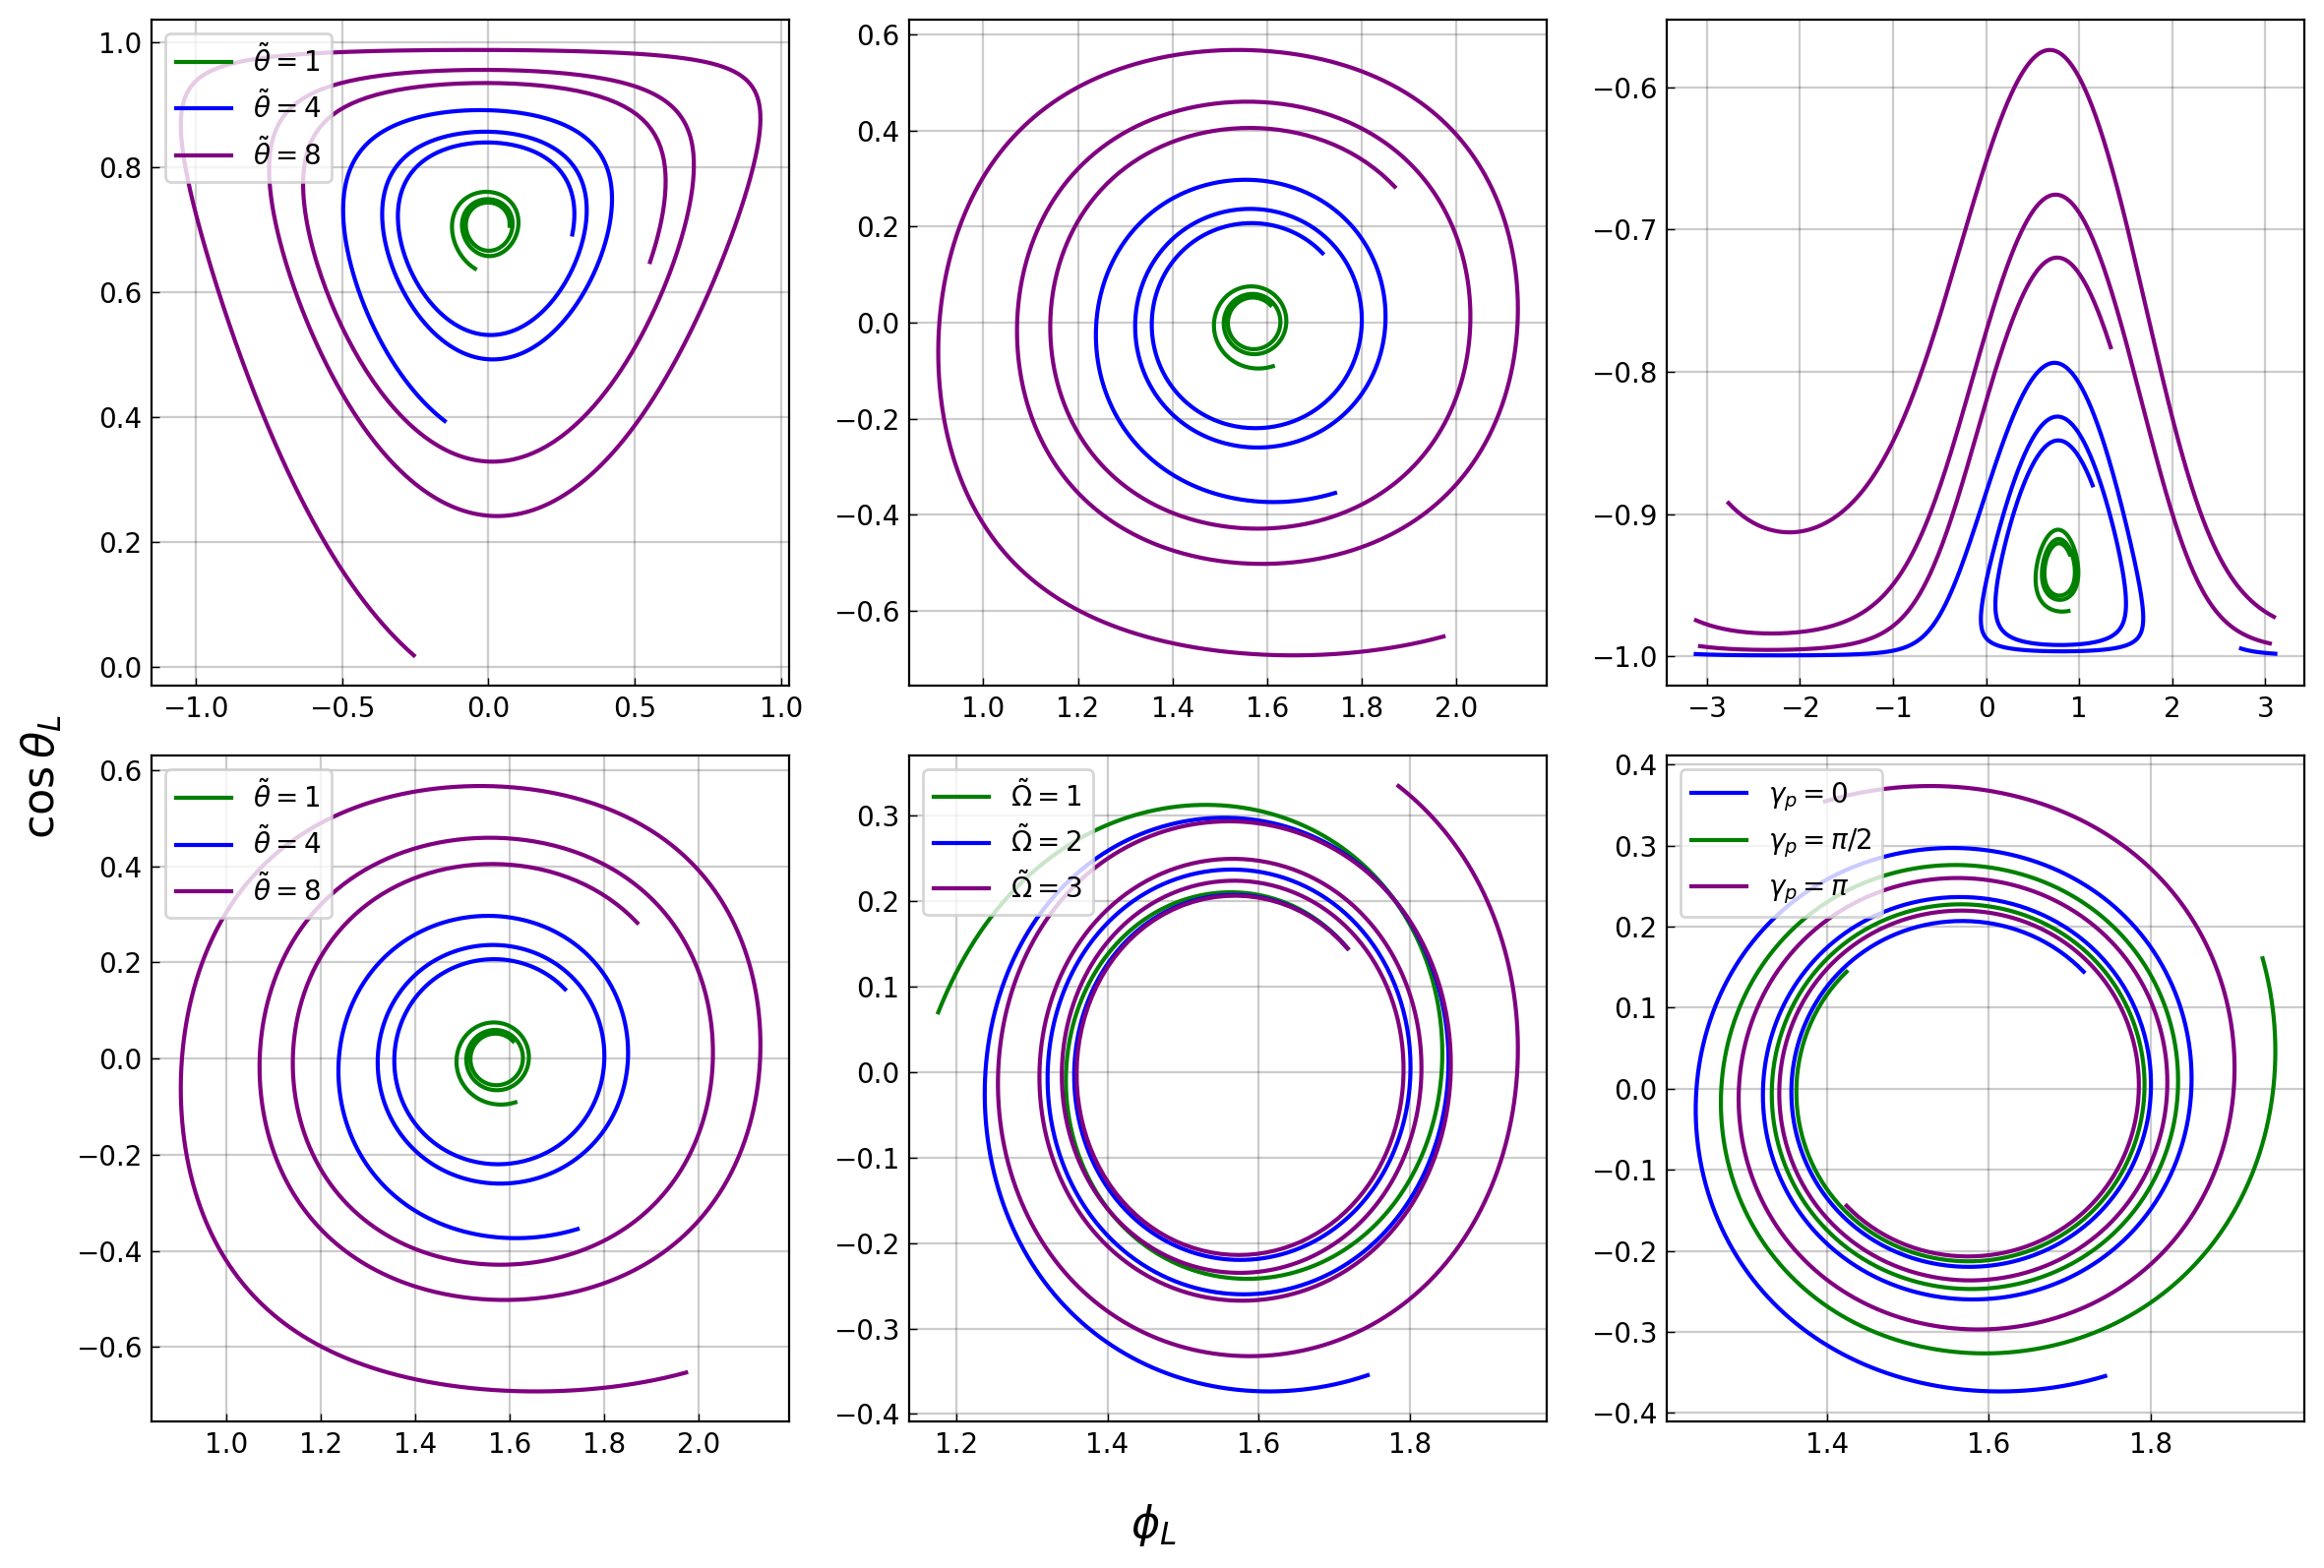

In [9]:
fig_size=[12,8]
fig,ax = plt.subplots(2,3,sharex=False, sharey=False,figsize=fig_size)

#system 1 theta_tilde
ax[0,0].plot(Mod_t_1_phi[0], Mod_t_1_cos_theta[0],color = 'g',label=r'$\tilde{\theta}=1$')#,\tilde{\Omega}=2$')
ax[0,0].plot(Mod_t_1_phi[1], Mod_t_1_cos_theta[1],color = 'b',label=r'$\tilde{\theta}=4$')#,\tilde{\Omega}=2$')
ax[0,0].plot(Mod_t_1_phi[2], Mod_t_1_cos_theta[2],color = 'purple',label=r'$\tilde{\theta}=8$')#, \tilde{\Omega}=2$')
ax[0,0].legend(shadow=False, fancybox=True,loc = 2,prop={'size': 10})
ax[0,0].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[0,0].grid()

#sytem 2 theta_tilde
ax[0,1].plot(Mod_t_2_phi[0], Mod_t_2_cos_theta[0],color = 'g',label=r'$\tilde{\theta}=1$')#,\tilde{\Omega}=2$')
ax[0,1].plot(Mod_t_2_phi[1], Mod_t_2_cos_theta[1],color = 'b',label=r'$\tilde{\theta}=4$')#,\tilde{\Omega}=2$')
ax[0,1].plot(Mod_t_2_phi[2], Mod_t_2_cos_theta[2],color = 'purple',label=r'$\tilde{\theta}=8$')#, \tilde{\Omega}=2$')
ax[0,1].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[0,1].grid()

#system 3 theta_tilde
ax[0,2].plot(Mod_t_3_phi[0], Mod_t_3_cos_theta[0],color = 'g',label=r'$\tilde{\theta}=1$')#,\tilde{\Omega}=2$')
ax[0,2].plot(Mod_t_3_phi[1], Mod_t_3_cos_theta[1],color = 'b',label=r'$\tilde{\theta}=4$')#,\tilde{\Omega}=2$')
ax[0,2].plot(Mod_t_3_phi[2], Mod_t_3_cos_theta[2],color = 'purple',label=r'$\tilde{\theta}=8$')#, \tilde{\Omega}=2$')
ax[0,2].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[0,2].grid()


#sytem 2 theta_tilde
ax[1,0].plot(Mod_t_2_phi[0], Mod_t_2_cos_theta[0],color = 'g',label=r'$\tilde{\theta}=1$')#,\tilde{\Omega}=2$')
ax[1,0].plot(Mod_t_2_phi[1], Mod_t_2_cos_theta[1],color = 'b',label=r'$\tilde{\theta}=4$')#,\tilde{\Omega}=2$')
ax[1,0].plot(Mod_t_2_phi[2], Mod_t_2_cos_theta[2],color = 'purple',label=r'$\tilde{\theta}=8$')#, \tilde{\Omega}=2$')
ax[1,0].legend(shadow=False, fancybox=True,loc = 2,prop={'size': 10})
ax[1,0].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[1,0].grid()

#system 2 omega_tilde
ax[1,1].plot(Mod_o_2_phi[0], Mod_o_2_cos_theta[0],color = 'g',label=r'$\tilde{\Omega}=1$')#,\tilde{\theta}=4$')
ax[1,1].plot(Mod_o_2_phi[1], Mod_o_2_cos_theta[1],color = 'b',label=r'$\tilde{\Omega}=2$')#,\tilde{\theta}=4$')
ax[1,1].plot(Mod_o_2_phi[2], Mod_o_2_cos_theta[2],color = 'purple',label=r'$\tilde{\Omega}=3$')#,\tilde{\theta}=4$')
ax[1,1].legend(shadow=False, fancybox=True,loc = 2,prop={'size': 10})
ax[1,1].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[1,1].grid()


#system 2 gamma_p
ax[1,2].plot(Mod_g_2_phi[0], Mod_g_2_cos_theta[0],color = 'b',label=r'$\gamma_p = 0$')#,\tilde{\theta}=4, \tilde{\Omega}=2$')
ax[1,2].plot(Mod_g_2_phi[1], Mod_g_2_cos_theta[1],color = 'g',label=r'$\gamma_p = \pi/2$')#,\tilde{\theta}=4, \tilde{\Omega}=2$')
ax[1,2].plot(Mod_g_2_phi[2], Mod_g_2_cos_theta[2],color = 'purple',label=r'$\gamma_p = \pi$')#,\tilde{\theta}=4, \tilde{\Omega}=2$')
ax[1,2].legend(shadow=False, fancybox=True,loc = 2,prop={'size': 10})
ax[1,2].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[1,2].grid()



#plt.setp(ax[0,:], xticks=[20,50,100,150,200], yticks = [-1,-0.5,0,0.5,1])
#plt.setp(ax[1,:], xticks=[20,50,100,150,200], yticks = [-0.5,-0.25,0,0.25,0.5])
#plt.setp(ax[2,:], xticks=[20,50,100,150,200], yticks = [-0.5,-0.25,0,0.25,0.5])

fig.supylabel(r'$\cos \theta_L$', fontsize = 16)
fig.supxlabel(r'$\phi_L$', fontsize = 16)

plt.grid(True)

plt.tight_layout()






fig = plt.gcf()
fig.savefig('figs/Modulation in L.pdf', format='pdf')

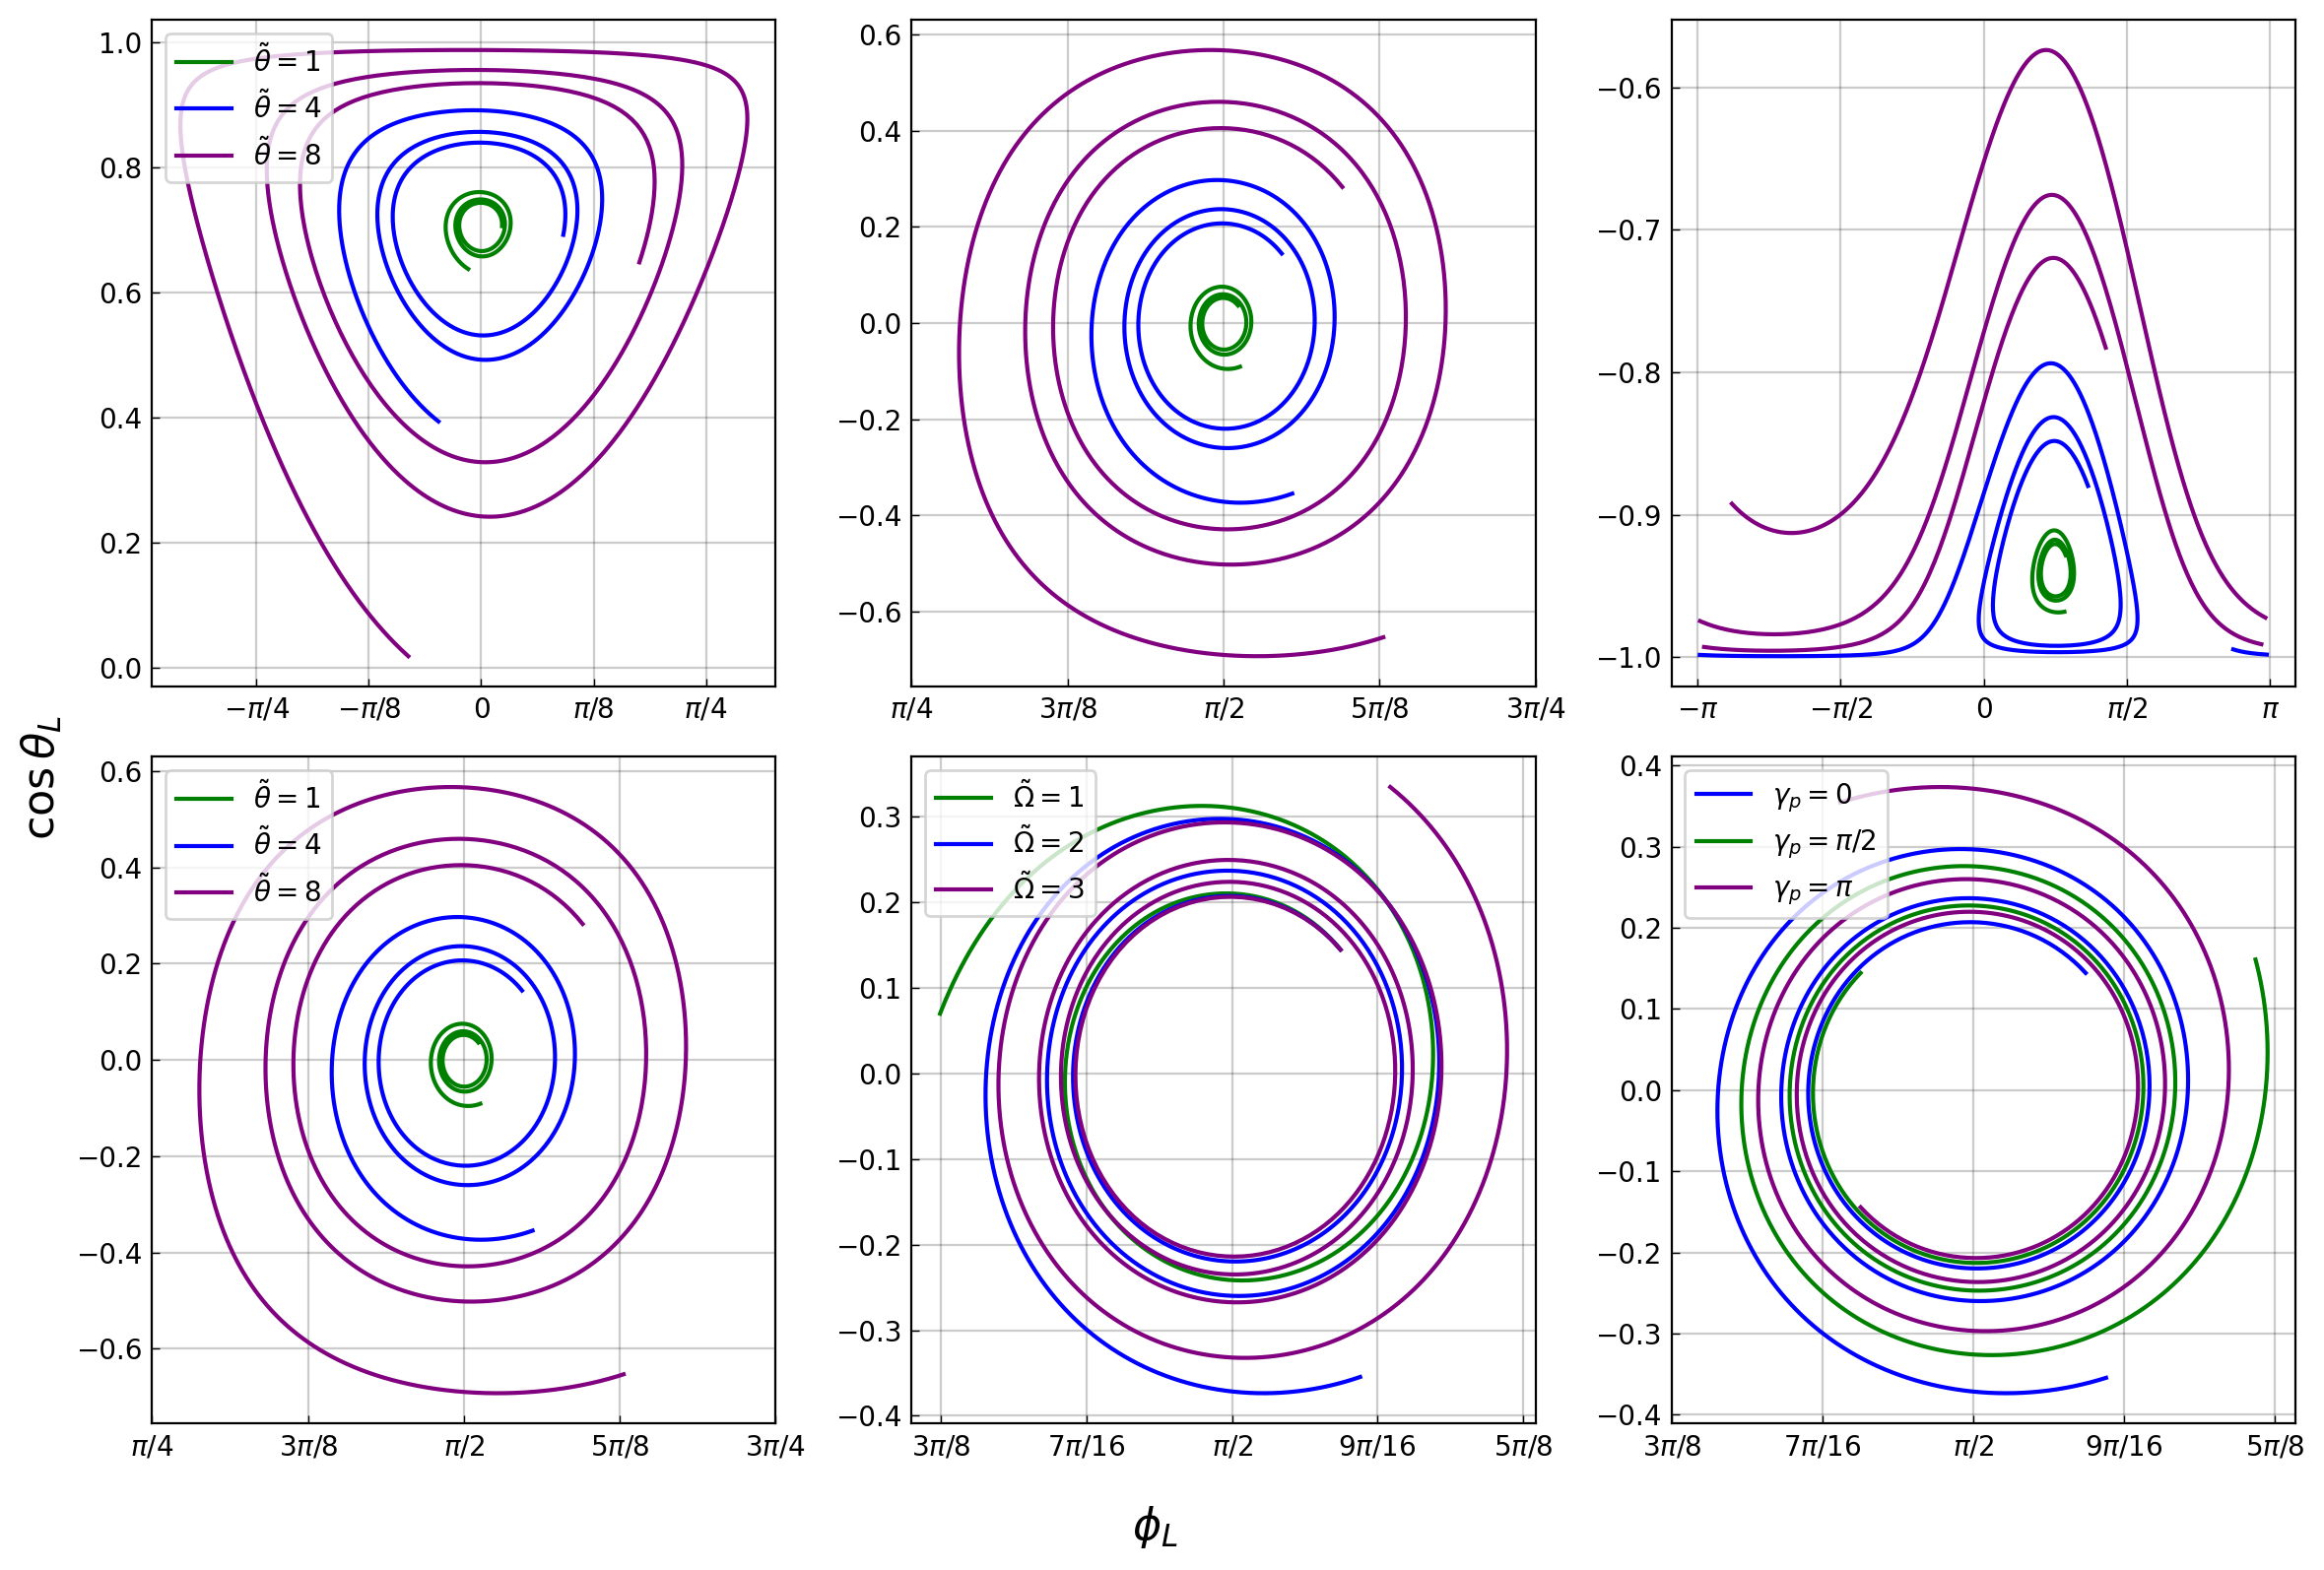

In [10]:
fig_size=[12,8]
fig,ax = plt.subplots(2,3,sharex=False, sharey=False,figsize=fig_size)

#system 1 theta_tilde
ax[0,0].plot(Mod_t_1_phi[0], Mod_t_1_cos_theta[0],color = 'g',label=r'$\tilde{\theta}=1$')#,\tilde{\Omega}=2$')
ax[0,0].plot(Mod_t_1_phi[1], Mod_t_1_cos_theta[1],color = 'b',label=r'$\tilde{\theta}=4$')#,\tilde{\Omega}=2$')
ax[0,0].plot(Mod_t_1_phi[2], Mod_t_1_cos_theta[2],color = 'purple',label=r'$\tilde{\theta}=8$')#, \tilde{\Omega}=2$')
ax[0,0].legend(shadow=False, fancybox=True,loc = 2,prop={'size': 10})
ax[0,0].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[0,0].grid()

#sytem 2 theta_tilde
ax[0,1].plot(Mod_t_2_phi[0], Mod_t_2_cos_theta[0],color = 'g',label=r'$\tilde{\theta}=1$')#,\tilde{\Omega}=2$')
ax[0,1].plot(Mod_t_2_phi[1], Mod_t_2_cos_theta[1],color = 'b',label=r'$\tilde{\theta}=4$')#,\tilde{\Omega}=2$')
ax[0,1].plot(Mod_t_2_phi[2], Mod_t_2_cos_theta[2],color = 'purple',label=r'$\tilde{\theta}=8$')#, \tilde{\Omega}=2$')
ax[0,1].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[0,1].grid()

#system 3 theta_tilde
ax[0,2].plot(Mod_t_3_phi[0], Mod_t_3_cos_theta[0],color = 'g',label=r'$\tilde{\theta}=1$')#,\tilde{\Omega}=2$')
ax[0,2].plot(Mod_t_3_phi[1], Mod_t_3_cos_theta[1],color = 'b',label=r'$\tilde{\theta}=4$')#,\tilde{\Omega}=2$')
ax[0,2].plot(Mod_t_3_phi[2], Mod_t_3_cos_theta[2],color = 'purple',label=r'$\tilde{\theta}=8$')#, \tilde{\Omega}=2$')
ax[0,2].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[0,2].grid()


#sytem 2 theta_tilde
ax[1,0].plot(Mod_t_2_phi[0], Mod_t_2_cos_theta[0],color = 'g',label=r'$\tilde{\theta}=1$')#,\tilde{\Omega}=2$')
ax[1,0].plot(Mod_t_2_phi[1], Mod_t_2_cos_theta[1],color = 'b',label=r'$\tilde{\theta}=4$')#,\tilde{\Omega}=2$')
ax[1,0].plot(Mod_t_2_phi[2], Mod_t_2_cos_theta[2],color = 'purple',label=r'$\tilde{\theta}=8$')#, \tilde{\Omega}=2$')
ax[1,0].legend(shadow=False, fancybox=True,loc = 2,prop={'size': 10})
ax[1,0].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[1,0].grid()

#system 2 omega_tilde
ax[1,1].plot(Mod_o_2_phi[0], Mod_o_2_cos_theta[0],color = 'g',label=r'$\tilde{\Omega}=1$')
ax[1,1].plot(Mod_o_2_phi[1], Mod_o_2_cos_theta[1],color = 'b',label=r'$\tilde{\Omega}=2$')
ax[1,1].plot(Mod_o_2_phi[2], Mod_o_2_cos_theta[2],color = 'purple',label=r'$\tilde{\Omega}=3$')
ax[1,1].legend(shadow=False, fancybox=True,loc = 2,prop={'size': 10})
ax[1,1].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[1,1].grid()


#system 2 gamma_p
ax[1,2].plot(Mod_g_2_phi[0], Mod_g_2_cos_theta[0],color = 'b',label=r'$\gamma_p = 0$')
ax[1,2].plot(Mod_g_2_phi[1], Mod_g_2_cos_theta[1],color = 'g',label=r'$\gamma_p = \pi/2$')
ax[1,2].plot(Mod_g_2_phi[2], Mod_g_2_cos_theta[2],color = 'purple',label=r'$\gamma_p = \pi$')
ax[1,2].legend(shadow=False, fancybox=True,loc = 2,prop={'size': 10})
ax[1,2].tick_params(direction = 'in', length = 3, width= 0.5, color = 'k', grid_color = 'k', grid_alpha = 0.2)
ax[1,2].grid()


ax[0,0].xaxis.set_ticks(np.array([-np.pi/4, -np.pi/8, 0, np.pi/8, np.pi/4]))
ax[0,0].xaxis.set_ticklabels([r'$-\pi/4$', r'$-\pi/8$', r'$0$', r'$\pi/8$', r'$\pi/4$'])

ax[0,1].xaxis.set_ticks(np.array([np.pi/4, 3*np.pi/8, np.pi/2, 5*np.pi/8, 3*np.pi/4]))
ax[0,1].xaxis.set_ticklabels([r'$\pi/4$', r'$3\pi/8$', r'$\pi/2$', r'$5\pi/8$', r'$3\pi/4$'])

ax[0,2].xaxis.set_ticks(np.array([-np.pi, -np.pi/2, 0, np.pi/2, np.pi]))
ax[0,2].xaxis.set_ticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])

ax[1,0].xaxis.set_ticks(np.array([np.pi/4, 3*np.pi/8, np.pi/2, 5*np.pi/8, 3*np.pi/4]))
ax[1,0].xaxis.set_ticklabels([r'$\pi/4$', r'$3\pi/8$', r'$\pi/2$', r'$5\pi/8$', r'$3\pi/4$'])

ax[1,1].xaxis.set_ticks(np.array([3*np.pi/8, 7*np.pi/16, np.pi/2, 9*np.pi/16, 5*np.pi/8]))
ax[1,1].xaxis.set_ticklabels([r'$3\pi/8$', r'$7\pi/16$', r'$\pi/2$', r'$9\pi/16$', r'$5\pi/8$'])

ax[1,2].xaxis.set_ticks(np.array([3*np.pi/8, 7*np.pi/16, np.pi/2, 9*np.pi/16, 5*np.pi/8]))
ax[1,2].xaxis.set_ticklabels([r'$3\pi/8$', r'$7\pi/16$', r'$\pi/2$', r'$9\pi/16$', r'$5\pi/8$'])

fig.supylabel(r'$\cos \theta_L$', fontsize = 16)
fig.supxlabel(r'$\phi_L$', fontsize = 16)

plt.grid(True)

plt.tight_layout()


